In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import quantile, where, random
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report,auc
from sklearn import metrics
import sympy
from sympy import expand
from sympy.functions.elementary.miscellaneous import sqrt
from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers
from xgboost import plot_importance
from imblearn.over_sampling import SMOTENC



In [ ]:
# Create New Features


# df=pd.read_csv('fraudTrain.csv', sep=";",index_col=False,)
# data=pd.read_csv('fraudTrain.csv')
# print(data)



# from sympy.core import nan
# # df.head()
# # df.describe()
# data=data.dropna()

# data['dob']=data['dob'].astype('str')
# print(data['dob'][0])
# # data['dob'] = data['dob'].map({'[':'@'})
# # data=data.drop(data[data['dob'].str.contains('@')])


# def date_ch(value):
#     return datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
# data['trans_date_trans_time'] = data['trans_date_trans_time'].apply(date_ch)

# def dob_ch(value):
#     return datetime.strptime(value, '%Y-%m-%d')


# data['dob'] = data['dob'].apply(dob_ch)
# # print(type(data['trans_date_trans_time'][0]))






# Feature Engineering
# The first feature that I want to add is the time interval between two consecutive transactions
# The second new feature is time interval between current transaction and date of last address change
# The third feature is to check whether the cardCVV matches  the enteredCVV
# The Forth feature is transaction time(morning,afternoon,evening,night)
# The fifth feature is the purchasing frequency of the current merchant category


# data=data.groupby(['cc_num','trans_date_trans_time',], as_index=False,sort=True).agg(lambda x: x)

# print(data1)

In [ ]:
# from sympy.functions.elementary.miscellaneous import sqrt
# data1=data
# data1['transfer_interval']=np.nan
# data1['distance']=np.nan
# data1['age']=np.nan
# data1['daytime']=np.nan
# data1['purchasing_frequency']=np.nan


# a=0
# for i in range (1,len(data1['cc_num']+1)):
#     try:
#         print(i)
#         # Transfer interval
#         if data1['cc_num'][i]==data1['cc_num'][i-1]:
#             data1['transfer_interval'][i]=((data1['trans_date_trans_time'][i]-data1['trans_date_trans_time'][i-1]).seconds+60*24*60*(data1['trans_date_trans_time'][i]-data1['trans_date_trans_time'][i-1]).days)
        
#         # # Distance
#         data1['distance'][i] =sqrt((data1['merch_lat'][i]-data1['lat'][i])**2+(data1['merch_long'][i]-data1['long'][i]))
#           # age
#         data1['age'][i]=data1['trans_date_trans_time'][i].year-data1['dob'][i].year
#           # Distance
#         data1['distance']=sqrt((data1['merch_lat'][i]-data1['lat'][i])**2+(data1['merch_long'][i]-data1['long'][i])**2)


#         #Day time
#         if data1['trans_date_trans_time'][i].hour>=6 and data1['trans_date_trans_time'][i].hour<=11:
#             data1['daytime'][i] = 'M'
#         elif data1['trans_date_trans_time'][i].hour>=12 and data1['trans_date_trans_time'][i].hour<=17:
#                 data1['daytime'][i] = 'N'
#         elif data1['trans_date_trans_time'][i].hour >= 18 and data1['trans_date_trans_time'][i].hour <= 23:
#                     data1['daytime'][i] = 'E'
#         else:
#                     data1['daytime'][i] = 'MN'

#         #Purchasing frequency of the current merchant category
#         if data1['cc_num'][i] == data1['cc_num'][i - 1]:
#             data2 = data1.iloc[a:i + 1]
#             data3=data2[data2['category'] == data2['category'][i]]
#             # Count the number of the current purchasing category and calculate the frequency
#             data1['purchasing_frequency'][i] = data3['category'].count() / (i - a + 1)
#         else:
#             a = i


#     except:
#         print(i,'error')
# data=data1
# print(data)

In [ ]:
# # top10 = data['zip'].value_counts().sort_values(ascending=False).head(500)
# # print(top10)
# data.to_csv('new.csv')

In [5]:
# Import cleaned dataset

df=pd.read_csv('new_data.csv')
df['merchant'] = df['merchant'].str.replace(']','@')




<ipython-input-5-2cf2563276db>:1: DtypeWarning: Columns (3,6,13,14,15,16,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('new_data.csv')
<ipython-input-5-2cf2563276db>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['merchant'] = df['merchant'].str.replace(']','@')


In [6]:
# transfer data type

from sympy.core.function import Lambda
df = df[~df['merchant'].str.contains('@')]

df['merch_lat']=df['merch_lat'].astype(float)
df['lat']=df['lat'].astype(float)
df['merch_long']=df['merch_long'].astype(float)
df['long']=df['long'].astype(float)
df['is_fraud']=df['is_fraud'].astype(int)
df['amt']=df['amt'].astype(float)                        

df['distance']=df.apply(lambda x: sqrt((x['merch_lat']-x['lat'])**2+(x['merch_long']-x['long'])**2), axis=1)
df['distance']=df['distance'].astype(float)

col_null = df.isnull().sum()
unqiue=df.nunique()
col_type=df.dtypes
result=pd.DataFrame({'null':col_null,'unqiue':unqiue,'type':col_type})
print(result)

                        null   unqiue     type
Unnamed: 0.1               0  1296635    int64
cc_num                     0      983    int64
trans_date_trans_time      0  1274771   object
Unnamed: 0                 0  1296635   object
merchant                   0      693   object
category                   0       14   object
amt                        0    52928  float64
first                      0      352   object
last                       0      481   object
gender                     0        2   object
street                     0      983   object
city                       0      894   object
state                      0       51   object
zip                        0      993   object
lat                        0      968  float64
long                       0      969  float64
city_pop                   0      940   object
job                        0      494   object
dob                        0      968   object
trans_num                  0  1296635   object
unix_time    

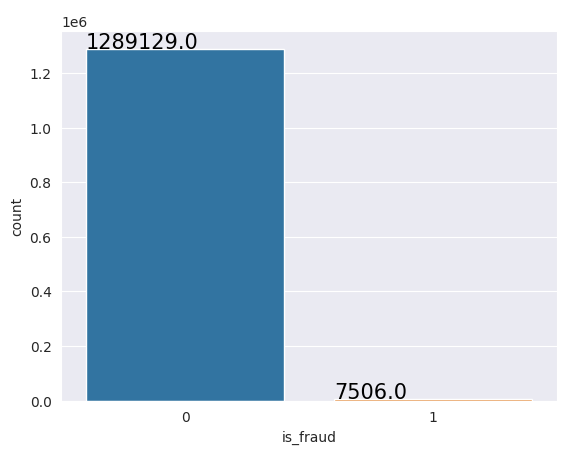

In [ ]:
# Plot a histogram of the class.
sns.set_style('darkgrid')
ax=sns.countplot(x='is_fraud',data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+50), color='black', size=15)
plt.show()


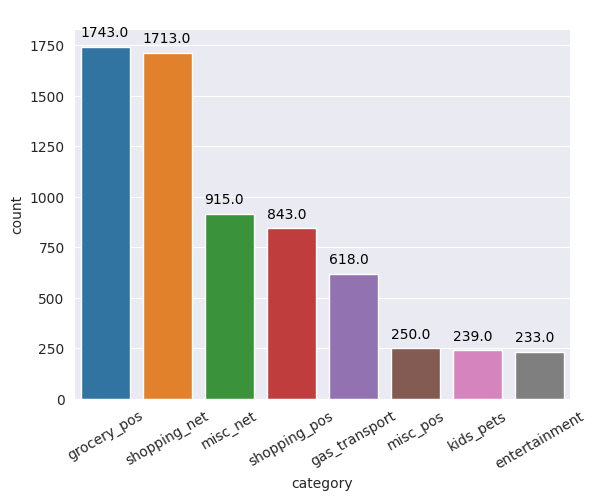

In [ ]:
df_fraud=df[df['is_fraud']==1]

sns.set_style('darkgrid')
most_occurring_values = df_fraud['category'].value_counts().head(8).index

data1 = df_fraud[df_fraud['category'].isin(most_occurring_values)]



fig=sns.countplot(x='category',data=data1,order = data1['category'].value_counts().index)
plt.xticks(rotation=30)
for p in fig.patches:
    fig.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+50), color='black', size=10)

plt.show()

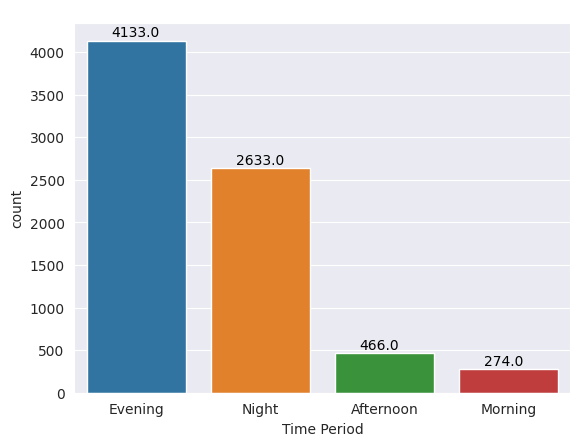

In [ ]:
sns.set_style('darkgrid')
most_occurring_values = df_fraud['daytime'].value_counts().head(8).index
data1 = df_fraud[df_fraud['daytime'].isin(most_occurring_values)]
fig=sns.countplot(x='daytime',data=data1,order = data1['daytime'].value_counts().index)
for p in fig.patches:
    fig.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+50), color='black', size=10)

plt.xticks(np.arange(4), labels=['Evening','Night','Afternoon','Morning'])
plt.xlabel('Time Period')
plt.show()


In [9]:
# Get dummy

scaler = StandardScaler()
pca = PCA(n_components=20)

df1=df.drop(['zip','Unnamed: 0.1','cc_num','trans_date_trans_time','Unnamed: 0','merchant','first','last','street','city','state','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)
df1=df1.dropna().reset_index()
label=df1['is_fraud']


df_pca=df1.drop('is_fraud',axis=1)
df_pca=df_pca.drop('index',axis=1)
print(df_pca)
df_pca=pd.get_dummies(df_pca, columns = ['gender','category','daytime','job'])

names=[str(x) for x in range(1,21)]


df_pca= pca.fit_transform(df_pca)
df_pca=scaler.fit_transform(df_pca)
df2 = pd.DataFrame(df_pca, columns = names)
df2['label']=label
print(df2.shape)




              category     amt gender                          job  \
0        gas_transport   52.94      F  Information systems manager   
1        gas_transport   82.08      F  Information systems manager   
2            kids_pets   34.79      F  Information systems manager   
3                 home   27.18      F  Information systems manager   
4         shopping_net    6.87      F  Information systems manager   
...                ...     ...    ...                          ...   
1273202  personal_care   60.47      M       Audiological scientist   
1273203  gas_transport   74.29      M       Audiological scientist   
1273204   shopping_net  246.56      M       Audiological scientist   
1273205   shopping_pos    2.62      M       Audiological scientist   
1273206  gas_transport   39.29      M       Audiological scientist   

         transfer_interval  distance   age daytime  purchasing_frequency  
0                  71862.0  0.997045  33.0       M              0.500000  
1        

<ipython-input-8-cf95757d559b>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_pca.corr()


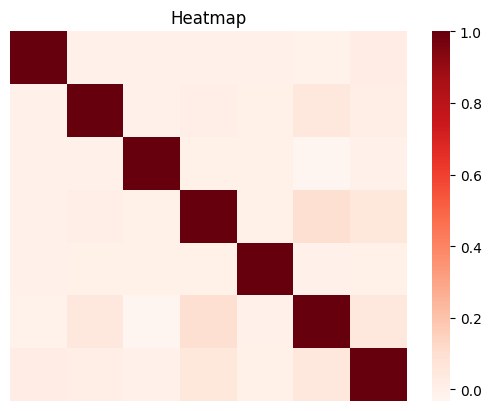

In [8]:
scaler = StandardScaler()
pca = PCA(n_components=20)

df1=df.drop(['Unnamed: 0','Unnamed: 0.1','lat','long','cc_num'],axis=1)
df1=df1.dropna().reset_index()
label=df1['is_fraud']


df_pca=df1.drop('is_fraud',axis=1)
df_pca=df_pca.drop('index',axis=1)

corr = df_pca.corr()
p1 = sns.heatmap(corr,cmap= 'Reds')
plt.xticks([])
plt.yticks([])
plt.title('Heatmap')

plt.show()

In [10]:
# Buliding training and testing datasets for One Class SVM

from sklearn.svm import OneClassSVM
df_osvm=df2

df_osvm_pos=df_osvm[df_osvm['label']==1].reset_index()
df_osvm_pos=df_osvm_pos.drop('index',axis=1)
df_osvm_neg=df_osvm[df_osvm['label']==0]

df_osvm_neg= df_osvm_neg.sample(frac=1,random_state=30).reset_index()
df_osvm_neg=df_osvm_neg.drop('index',axis=1)
df_osvm_test_neg=df_osvm_neg[0:7400]
df_osvm_train=df_osvm_neg[7400:57400]
df_osvm_train=df_osvm_train.drop('label',axis=1)


df_osvm_test=pd.concat([df_osvm_test_neg,df_osvm_pos]).reset_index()
df_osvm_test=df_osvm_test.drop('index',axis=1)
df_osvm_test_data=df_osvm_test.drop('label',axis=1)
df_osvm_test_label=df_osvm_test['label']



In [11]:
# One class SVM-rbf
from collections import Counter

one_svm = OneClassSVM(kernel='rbf',gamma=1).fit(df_osvm_train)
pred_v=one_svm.predict(df_osvm_test_data)

print(Counter(pred_v))
pred_v[pred_v==1]=0
pred_v[pred_v==-1]=1


print(df_osvm_test_label)
print(pred_v)




#  F1 score
f1_test1 = f1_score(pred_v, df_osvm_test_label)
print("\nTest F1 Score = %f" % f1_test1)

from sklearn.metrics import confusion_matrix




C_mat=pd.DataFrame(confusion_matrix(df_osvm_test_label,pred_v,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print(C_mat)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pred_v, df_osvm_test_label)
print(acc)

Counter({-1: 10792, 1: 3990})
0        0
1        0
2        0
3        0
4        0
        ..
14777    1
14778    1
14779    1
14780    1
14781    1
Name: label, Length: 14782, dtype: int64
[0 1 1 ... 1 1 1]

Test F1 Score = 0.766590
          Pred:0  Pred:1
Actual:0    3574    3826
Actual:1     416    6966
0.713029360032472


In [ ]:
# One class polynomial kernel
from collections import Counter

one_svm = OneClassSVM(kernel='poly', degree = 3).fit(df_osvm_train)
pred_v=one_svm.predict(df_osvm_test_data)

print(Counter(pred_v))
pred_v[pred_v==1]=0
pred_v[pred_v==-1]=1


print(df_osvm_test_label)
print(pred_v)




#  F1 score
f1_test1 = f1_score(pred_v, df_osvm_test_label)
print("\nTest F1 Score = %f" % f1_test1)

from sklearn.metrics import confusion_matrix




C_mat=pd.DataFrame(confusion_matrix(df_osvm_test_label,pred_v,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print(C_mat)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pred_v, df_osvm_test_label)
print(acc)

Counter({1: 8231, -1: 6551})
0        0
1        0
2        0
3        0
4        0
        ..
14777    1
14778    1
14779    1
14780    1
14781    1
Name: label, Length: 14782, dtype: int64
[0 1 0 ... 0 0 0]

Test F1 Score = 0.410967
          Pred:0  Pred:1
Actual:0    3712    3688
Actual:1    4519    2863
0.44479772696522796


In [ ]:
# One class SVM---sigmoid


one_svm = OneClassSVM(kernel='sigmoid').fit(df_osvm_train)
pred_v=one_svm.predict(df_osvm_test_data)
print(Counter(pred_v))
pred_v[pred_v==1]=0
pred_v[pred_v==-1]=1

print(df_osvm_test_label)
print(pred_v)

#  F1 score
f1_test1 = f1_score(pred_v, df_osvm_test_label)
print("\nTest F1 Score = %f" % f1_test1)

from sklearn.metrics import confusion_matrix



C_mat=pd.DataFrame(confusion_matrix(df_osvm_test_label,pred_v,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print(C_mat)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pred_v, df_osvm_test_label)
print(acc)

Counter({-1: 8714, 1: 6068})
0        0
1        0
2        0
3        0
4        0
        ..
14777    1
14778    1
14779    1
14780    1
14781    1
Name: label, Length: 14782, dtype: int64
[1 0 0 ... 1 1 1]

Test F1 Score = 0.626864
          Pred:0  Pred:1
Actual:0    3731    3669
Actual:1    2337    5045
0.5936950345014207


In [ ]:
# One class SVM---'linear'

one_svm = OneClassSVM(kernel='linear').fit(df_osvm_train)
pred_v=one_svm.predict(df_osvm_test_data)

print(Counter(pred_v))
pred_v[pred_v==1]=0
pred_v[pred_v==-1]=1
print(df_osvm_test_label)
print(pred_v)

#  F1 score
f1_test1 = f1_score(pred_v, df_osvm_test_label)
print("\nTest F1 Score = %f" % f1_test1)

from sklearn.metrics import confusion_matrix



C_mat=pd.DataFrame(confusion_matrix(df_osvm_test_label,pred_v,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print(C_mat)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pred_v, df_osvm_test_label)
print(acc)

Counter({-1: 7589, 1: 7193})
0        0
1        0
2        0
3        0
4        0
        ..
14777    1
14778    1
14779    1
14780    1
14781    1
Name: label, Length: 14782, dtype: int64
[0 1 0 ... 0 0 0]

Test F1 Score = 0.465968
          Pred:0  Pred:1
Actual:0    3299    4101
Actual:1    3894    3488
0.45913949397916387


In [ ]:
# IsolationForest

from sklearn.ensemble import IsolationForest

df_IF=pd.concat([df_osvm_neg[0:100000],df_osvm_pos]).reset_index()
df_IF=df_IF.drop('index',axis=1)
df_IF_label=df_IF['label']
df_IF_train=df_IF.drop('label',axis=1)

print(df_IF_label)



0         0
1         0
2         0
3         0
4         0
         ..
107377    1
107378    1
107379    1
107380    1
107381    1
Name: label, Length: 107382, dtype: int64


In [ ]:
IF = IsolationForest(n_estimators=100, contamination=.069)
predictions = IF.fit_predict(df_IF_train)

print(predictions,df_IF_label)
print(Counter(predictions))
predictions[predictions==1]=0
predictions[predictions==-1]=1


#  F1 score
f1_test1 = f1_score(df_IF_label,predictions)
print("\nTest F1 Score = %f" % f1_test1)

C_mat=pd.DataFrame(confusion_matrix(df_IF_label,predictions,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print(C_mat)

acc=accuracy_score(predictions, df_IF_label)
print(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[ 1  1  1 ... -1 -1 -1] 0         0
1         0
2         0
3         0
4         0
         ..
107377    1
107378    1
107379    1
107380    1
107381    1
Name: label, Length: 107382, dtype: int64
Counter({1: 99972, -1: 7410})

Test F1 Score = 0.361547
          Pred:0  Pred:1
Actual:0   95264    4736
Actual:1    4708    2674
0.9120522992680338


In [ ]:
# DBSCAN

df_DBSCAN=pd.concat([df_osvm_neg[0:100000],df_osvm_pos]).reset_index()
df_DBSCAN=df_DBSCAN.drop('index',axis=1)
df_DBSCAN_label=df_DBSCAN['label']
df_DBSCAN_train=df_DBSCAN.drop('label',axis=1)


model1 = DBSCAN().fit(df_DBSCAN_train)
prediction = model1.labels_


prediction[prediction>=0]=0
prediction[prediction==-1]=1

#  F1 score
f1_test1 = f1_score(df_DBSCAN_label,prediction)
print("\nTest F1 Score = %f" % f1_test1)

C_mat=pd.DataFrame(confusion_matrix(df_DBSCAN_label,prediction,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print(C_mat)

acc=accuracy_score(prediction, df_DBSCAN_label)
print(acc)



Test F1 Score = 0.219066
          Pred:0  Pred:1
Actual:0   87822   12178
Actual:1    4976    2406
0.840252556294351


In [ ]:
# GMM

GMM = GaussianMixture(n_components=1, covariance_type='full')
GMM.fit(df_DBSCAN_train)
prediction = GMM.score_samples(df_DBSCAN_train)
thresh = quantile(prediction, .07)

prediction[prediction>=thresh]=0
prediction[prediction<thresh]=1

#  F1 score
f1_test1 = f1_score(df_DBSCAN_label,prediction)
print("\nTest F1 Score = %f" % f1_test1)

C_mat=pd.DataFrame(confusion_matrix(df_DBSCAN_label,prediction,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print(C_mat)

acc=accuracy_score(prediction, df_DBSCAN_label)
print(acc)


Test F1 Score = 0.233170
          Pred:0  Pred:1
Actual:0   94220    5780
Actual:1    5645    1737
0.8936041422212289


In [ ]:
# # df_sup=df2



# # df_pos=df_sup[df_sup['label']==1].reset_index()
# # df_pos=df_pos.drop('index',axis=1)
# # df_neg=df_sup[df_sup['label']==0]

# # df_neg= df_neg.sample(frac=1,random_state=30).reset_index()
# # df_neg=df_neg.drop('index',axis=1)
# # df_neg=df_neg[0:10000]
# # df_sup=pd.concat([df_neg,df_pos]).reset_index()
# # df_sup=df_sup.drop('index',axis=1)



# # X=df_sup.drop(['label'], axis = 1)
# # y=df_sup[['label']]
# # smenn = SMOTEENN()
# # X_resampled, y_resampled = smenn.fit_resample(X, y)
# # df_sup=X_resampled
# # df_sup['label']=y_resampled
# # print(df_sup.describe())
# # print(Counter(df_sup['label']))

# # df_smoth=df_sup

# df1=df.drop(['zip','Unnamed: 0.1','cc_num','trans_date_trans_time','Unnamed: 0','merchant','first','last','street','city','state','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)
# df1=df1.dropna().reset_index()
# # label=df1['is_fraud']
# print(len(label))

# df_pos=df1[df1['is_fraud']==1].reset_index()
# df_pos=df_pos.drop('index',axis=1)
# df_neg=df1[df1['is_fraud']==0]

# df_neg= df_neg.sample(frac=1,random_state=30).reset_index()
# df_neg=df_neg.drop('index',axis=1)
# df_neg=df_neg[0:20000]
# df1=pd.concat([df_neg,df_pos]).reset_index()
# df1=df1.drop('index',axis=1)
# label=df1['is_fraud']


# # X=df1.drop(['is_fraud'], axis = 1)
# # y=df1[['is_fraud']]
# # smenn = SMOTEENN()
# # X_resampled, y_resampled = smenn.fit_resample(X, y)
# # df_sup=X_resampled
# # df_sup['label']=y_resampled
# # print(df_sup.describe())
# # print(Counter(df_sup['label']))

# df_kpca=df1.drop('is_fraud',axis=1)
# label=df1['is_fraud']
# # df_kpca=df_kpca.drop('index',axis=1)
# df_kpca=pd.get_dummies(df_kpca, columns = ['gender','category','daytime','job'])
# df_kpca['label']=label


# X=df_kpca.drop(['label'], axis = 1)
# y=df_kpca[['label']]
# smenn = SMOTEENN()
# X_resampled, y_resampled = smenn.fit_resample(X, y)
# df_sup=X_resampled
# df_sup['label']=y_resampled
# label=df_sup['label']
# df_sup=df_sup.drop('level_0',axis=1)
# print(df_sup.describe())
# print(Counter(df_sup['label']))







# scaler = StandardScaler()
# pca = PCA(n_components=20)



# names=[str(x) for x in range(1,21)]


# df_pca= pca.fit_transform(df_sup)
# df_pca=scaler.fit_transform(df_pca)
# df2 = pd.DataFrame(df_pca, columns = names)
# df2['label']=label






# # # Number of positive class
# # n = df_sup [df_sup ['label'] == 0]
# # # Number of negative class
# # p = df_sup[df_sup['label'] == 1]
# # frac = float(len(p) / len(n))
# # # Undersampling
# # data_com = pd.concat([n.sample(frac=frac),p])
# # df_sup=data_com
# # print(df_sup)

# # col_null = df_sup.isnull().sum()
# # unqiue=df_sup.nunique()
# # col_type=df_sup.dtypes
# # result=pd.DataFrame({'null':col_null,'unqiue':unqiue,'type':col_type})
# # print(result)
# # print(df_sup.describe())

# x = df2 .drop(['label'], axis = 1)
# y = df2 [['label']]


# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)
# print(y_test)
# print(Counter(y_test))

22483


<ipython-input-45-73a82e4ab5d8>:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sup['label']=y_resampled


                amt  transfer_interval      distance           age  \
count  22848.000000       22848.000000  22848.000000  22848.000000   
mean     356.391780       22508.356745      0.767699     47.359708   
std      372.157414       40755.173214      0.265911     17.636814   
min        1.000000           1.000000      0.002188     14.000000   
25%       40.542500        1643.925930      0.587672     33.000000   
50%      164.922167        6241.026619      0.793771     46.000000   
75%      733.464247       26451.304593      0.963351     59.000000   
max     1645.340000      631768.000000      1.409189     96.000000   

       purchasing_frequency      gender_F      gender_M  \
count          22848.000000  22848.000000  22848.000000   
mean               0.102110      0.472426      0.429884   
std                0.082079      0.499250      0.495070   
min                0.003497      0.000000      0.000000   
25%                0.067093      0.000000      0.000000   
50%            

In [13]:
# Building datasets for bench mark models 

scaler = StandardScaler()
pca = PCA(n_components=20)

df1=df.drop(['zip','Unnamed: 0.1','cc_num','trans_date_trans_time','Unnamed: 0','merchant','first','last','street','city','state','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)
df1=df1.dropna().reset_index()


df_pos=df1[df1['is_fraud']==1].reset_index()
df_pos=df_pos.drop('index',axis=1)
df_neg=df1[df1['is_fraud']==0]

df_neg= df_neg.sample(frac=1,random_state=30).reset_index()
df_neg=df_neg.drop('index',axis=1)
df_neg=df_neg[0:20000]
df1=pd.concat([df_neg,df_pos]).reset_index()
df1=df1.drop('index',axis=1)
label=df1['is_fraud']


df_kpca=df1.drop('is_fraud',axis=1)
# df_kpca=df_kpca.drop('index',axis=1)
df_kpca=pd.get_dummies(df_kpca, columns = ['gender','category','daytime','job'])
df_kpca['label']=label




print(Counter(df_kpca['label']))
df_kpca=df_kpca.reset_index()
# df_kpca=df_kpca.reset_index()
df_kpca=df_kpca.drop('index',axis=1)
df_kpca=df_kpca.drop('level_0',axis=1)
print(1,df_kpca['label'])




x1=df_kpca.drop(['label'], axis = 1)
y1=df_kpca['label']
smenn = SMOTEENN()
X_resampled, y_resampled = smenn.fit_resample(x1, y1)
print(Counter(y_resampled))
df_kpca=X_resampled
df_kpca['label']=y_resampled


names=[str(x) for x in range(1,21)]

df_pca_1=df_kpca.drop('label',axis=1)
label_1=df_kpca['label']

df_pca= pca .fit_transform(df_pca_1)
df_pca=scaler.fit_transform(df_pca)
df3 = pd.DataFrame(df_pca, columns = names)
df3['label']=label_1
print(df3.shape)


x1 = df3.drop(['label'], axis = 1)
y1 = df3[['label']]
x_train,x_test,y_train,y_test=train_test_split(x1, y1,test_size=0.3,random_state=200)
print(y_test)


Counter({0: 20000, 1: 7382})
1 0        0
1        0
2        0
3        0
4        0
        ..
27377    1
27378    1
27379    1
27380    1
27381    1
Name: label, Length: 27382, dtype: int64
Counter({1: 15879, 0: 13833})


<ipython-input-13-9b503a689e6b>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_kpca['label']=y_resampled


(29712, 21)
       label
13108      0
19427      1
26492      1
4995       0
11754      0
...      ...
9405       0
20288      1
5439       0
24411      1
6793       0

[8914 rows x 1 columns]


In [ ]:
# Xgboost model

# Set parameters
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 0.1,
    'subsample': 1.0,
    'colsample_bytree': 0.75,
    'min_child_weight': 3,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4
}
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 500



# # Tune parameters
# from sklearn.model_selection import GridSearchCV
# param = {'max_depth': [3, 6, 10],
#          'min_child_weight':[1, 3, 5],
#           'learning_rate': [0.01, 0.1, 0.2],
#           'subsample': [0.5,1.0],
#             'lambda':[0.1, 0.5]
#           }



# xgbc = xgb.XGBClassifier( objective= 'binary:logistic',seed=42)
# clf = GridSearchCV(estimator=xgbc,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf.best_params_)
# Fitting 5 folds for each of 108 candidates, totalling 540 fits
# Best parameters: {'lambda': 0.5, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 1.0}




params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 10,
    'lambda': 0.5,
    'subsample': 1.0,
    'colsample_bytree': 0.75,
    'min_child_weight': 5,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4,
    'learning_rate':0.2
}
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 500



#Train Xgboost model
model = xgb.train(params, dtrain, num_rounds)

# Test the model
dtest = xgb.DMatrix(x_test)
y_pred = model.predict(dtest)

dtrain_x = xgb.DMatrix(x_train)
dtrain_y = xgb.DMatrix(y_train)
y_pred_train=model.predict(dtrain_x )

# f1 score
print('Train f1 score is',f1_score(y_train,y_pred_train))
print('Test f1 score is',f1_score(y_test,y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)



[02:09:50] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Train f1 score is 1.0
Test f1 score is 0.9947665899099852
          Pred:0  Pred:1
Actual:0    4171      17
Actual:1      33    4752


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# Tune parameters
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators': [200, 400, 600],
#                'max_depth': [5, 10, 15],
#                'min_samples_split': [2, 5],
#                'min_samples_leaf': [1, 2]}

# clf_RF = GridSearchCV(estimator=rf,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_RF.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf_RF.best_params_)

RF = RandomForestClassifier(n_estimators = 400,max_depth= 15, min_samples_leaf= 1, min_samples_split= 2, random_state = 42)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)



# f1 score
print('Test f1 score is',f1_score(y_test,y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

<ipython-input-5-25415b3c332b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y_train)


Test f1 score is 0.9933983024206224
          Pred:0  Pred:1
Actual:0    4170      18
Actual:1      45    4740


In [ ]:
# SVM

from sklearn.ensemble import RandomForestClassifier

svc = SVC()
# Tune parameters

# param = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}

# clf_svc = GridSearchCV(estimator=svc,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_svc.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf_svc.best_params_)

SVM_MODEL = SVC(C=10,gamma=0.1, kernel= 'rbf', random_state = 42)
SVM_MODEL.fit(x_train,y_train) 
y_pred = SVM_MODEL.predict(x_test)



# f1 score
print('Test f1 score is',f1_score(y_test,y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test f1 score is 0.9934198157548411
          Pred:0  Pred:1
Actual:0    2464      19
Actual:1      16    2642


In [ ]:
# KNN
knn = KNeighborsClassifier()

# Tune parameters

# param = {'n_neighbors': [5,10,13,15,20], 'weights' : ['uniform','distance'],
#                'metric' : ['euclidean','manhattan','minkowski']}

# clf_svc = GridSearchCV(estimator=knn,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_svc.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf_svc.best_params_)
# # Best parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


Knn_MODEL = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
Knn_MODEL.fit(x_train,y_train) 
y_pred = Knn_MODEL.predict(x_test)



# f1 score
print('Test f1 score is',f1_score(y_test,y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)




/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test f1 score is 0.9840935426103444
          Pred:0  Pred:1
Actual:0    4151      37
Actual:1     114    4671


In [ ]:
# LogisticRegression  

log = LogisticRegression()

# Tune parameters

# param = {'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20)}



# clf_svc = GridSearchCV(estimator=log,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_svc.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf_svc.best_params_)
# # 'C': 78.47599703514607, 'penalty': 'l2'

log_MODEL =LogisticRegression(penalty = 'l2', C = 78.476)
log_MODEL.fit(x_train,y_train) 
y_pred = log_MODEL.predict(x_test)



# f1 score
print('Test f1 score is',f1_score(y_test,y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)





Test f1 score is 0.8907980145093547
          Pred:0  Pred:1
Actual:0    2236     247
Actual:1     325    2333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# ANN model

ANN_model=Sequential([
    Dense(units=16,input_dim=20,activation='relu' ),
    Dense(units=24,activation='relu' ), 

    Dropout(0.5),
    # Dense(units=20,activation='relu' ),
    Dense(units=24, activation='relu' ),
# kernel_regularizer=regularizers.l2(0.001)
    
    Dense(units=1,activation='sigmoid' ),]

)
ANN_model.compile(optimizer='sgd', loss="binary_crossentropy", metrics=['accuracy'])

history = ANN_model.fit(x_train,y_train, 
                    epochs=35, 
                    validation_data=(x_train, y_train), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])


Epoch 1/35
655/655 [==============================] - 3s 3ms/step - loss: 0.6259 - accuracy: 0.6662 - val_loss: 0.4610 - val_accuracy: 0.8735 - lr: 0.0100
Epoch 2/35
655/655 [==============================] - 2s 3ms/step - loss: 0.4007 - accuracy: 0.8408 - val_loss: 0.2311 - val_accuracy: 0.9292 - lr: 0.0100
Epoch 3/35
655/655 [==============================] - 2s 4ms/step - loss: 0.2592 - accuracy: 0.9043 - val_loss: 0.1591 - val_accuracy: 0.9446 - lr: 0.0100
Epoch 4/35
655/655 [==============================] - 2s 3ms/step - loss: 0.2023 - accuracy: 0.9274 - val_loss: 0.1305 - val_accuracy: 0.9527 - lr: 0.0100
Epoch 5/35
655/655 [==============================] - 2s 3ms/step - loss: 0.1752 - accuracy: 0.9369 - val_loss: 0.1145 - val_accuracy: 0.9630 - lr: 0.0100
Epoch 6/35
655/655 [==============================] - 2s 3ms/step - loss: 0.1533 - accuracy: 0.9466 - val_loss: 0.1035 - val_accuracy: 0.9664 - lr: 0.0100
Epoch 7/35
655/655 [==============================] - 2s 3ms/step - lo

In [ ]:
y_pred = ANN_model.predict(x_test)

# print(y_pred)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<=0.5]=0

# f1 score
print('Test f1 score is',f1_score(y_test,y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

281/281 [==============================] - 0s 1ms/step
Test f1 score is 0.9768331562167907
          Pred:0  Pred:1
Actual:0    4159      29
Actual:1     189    4596


In [ ]:
# # kernelizing data

# scaler = StandardScaler()
# Kpca = KernelPCA(n_components=20, kernel='rbf')

# df1=df.drop(['zip','Unnamed: 0.1','cc_num','trans_date_trans_time','Unnamed: 0','merchant','first','last','street','city','state','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)
# df1=df1.dropna().reset_index()
# # label=df1['is_fraud']
# print(len(label))

# df_pos=df1[df1['is_fraud']==1].reset_index()
# df_pos=df_pos.drop('index',axis=1)
# df_neg=df1[df1['is_fraud']==0]

# df_neg= df_neg.sample(frac=1,random_state=30).reset_index()
# df_neg=df_neg.drop('index',axis=1)
# df_neg=df_neg[0:20000]
# df1=pd.concat([df_neg,df_pos]).reset_index()
# df1=df1.drop('index',axis=1)
# label=df1['is_fraud']


# df_kpca=df1.drop('is_fraud',axis=1)
# # df_kpca=df_kpca.drop('index',axis=1)
# df_kpca=pd.get_dummies(df_kpca, columns = ['gender','category','daytime','job'])
# df_kpca['label']=label

# # # Number of positive class
# # n1 = df_kpca[df_kpca ['label'] == 0]
# # # Number of negative class
# # p1 = df_kpca[df_kpca['label'] == 1]
# # kfrac = float(len(p) / len(n))
# # # Undersampling
# # df_kpca = pd.concat([n1.sample(frac=kfrac),p1])

# # X=df_kpca.drop(['label'], axis = 1)
# # y=df_kpca[['label']]
# # smenn = SMOTEENN()
# # X_resampled, y_resampled = smenn.fit_resample(X, y)
# # df_kpca=X_resampled
# # df_kpca['label']=y_resampled
# # # print(df_kpca.describe())



# print(Counter(df_kpca['label']))
# df_kpca=df_kpca.reset_index()
# # df_kpca=df_kpca.reset_index()
# df_kpca=df_kpca.drop('index',axis=1)
# df_kpca=df_kpca.drop('level_0',axis=1)
# print(1,df_kpca['label'])


# # # # col_null = df_kpca.isnull().sum()
# # # # unqiue=df_kpca.nunique()
# # # # col_type=df_kpca.dtypes
# # # # result=pd.DataFrame({'null':col_null,'unqiue':unqiue,'type':col_type})
# # # # print(result)
# # # # print(df_kpca.describe())

# names=[str(x) for x in range(1,21)]

# df_pca_1=df_kpca.drop('label',axis=1)
# label_1=df_kpca['label']




# df_pca_1= Kpca.fit_transform(df_pca_1)
# df_kpca=scaler.fit_transform(df_pca_1)
# df3 = pd.DataFrame(df_kpca, columns = names)
# df3['label']=label_1
# print(df3.shape)


# x1 = df3.drop(['label'], axis = 1)
# y1 = df3[['label']]







# # smenn = SMOTEENN()
# # X_resampled, y_resampled = smenn.fit_resample(x1, y1)
# # print(Counter(y_resampled))

# x_train_k,x_test_k,y_train_k,y_test_k=train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=200)
# print(y_test_k)










27382
Counter({0: 20000, 1: 7382})
1 0        0
1        0
2        0
3        0
4        0
        ..
27377    1
27378    1
27379    1
27380    1
27381    1
Name: label, Length: 27382, dtype: int64


In [14]:
# Sampling-Kernelizing-Modeling

df_pca_2=df_kpca.drop('label',axis=1)
label_2=df_kpca['label']

scaler = StandardScaler()
Kpca = KernelPCA(n_components=20, kernel='rbf')
names=[str(x) for x in range(1,21)]

df_pca_2= Kpca.fit_transform(df_pca_2)
df_pca_2=scaler.fit_transform(df_pca_2)
df3 = pd.DataFrame(df_pca_2, columns = names)
df3['label']=label_1
print(df3.shape)


x1 = df3.drop(['label'], axis = 1)
y1 = df3[['label']]







# smenn = SMOTEENN()
# X_resampled, y_resampled = smenn.fit_resample(x1, y1)
# print(Counter(y_resampled))

x_train_k,x_test_k,y_train_k,y_test_k=train_test_split(x1 , y1 ,test_size=0.3,random_state=200)
print(y_test_k)





(29712, 21)
       label
13108      0
19427      1
26492      1
4995       0
11754      0
...      ...
9405       0
20288      1
5439       0
24411      1
6793       0

[8914 rows x 1 columns]


In [17]:
# Xgboost model

# Set parameters
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 0.1,
    'subsample': 1.0,
    'colsample_bytree': 0.75,
    'min_child_weight': 3,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4
}
dtrain = xgb.DMatrix(x_train_k, y_train_k)
num_rounds = 500



# # Tune parameters
# from sklearn.model_selection import GridSearchCV
# param = {'max_depth': [3, 6, 10],
#          'min_child_weight':[1, 3, 5],
#           'learning_rate': [0.01, 0.1, 0.2],
#           'subsample': [0.5,1.0],
#             'lambda':[0.1, 0.5]
#           }



# xgbc = xgb.XGBClassifier( objective= 'binary:logistic',seed=42)
# clf = GridSearchCV(estimator=xgbc,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf.best_params_)
# # Fitting 5 folds for each of 108 candidates, totalling 540 fits
# # Best parameters: {'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5}




params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 10,
    'lambda': 0.1,
    'subsample': 0.5,
    'colsample_bytree': 0.75,
    'min_child_weight': 1,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4,
    'learning_rate':0.2
}
dtrain = xgb.DMatrix(x_train_k, y_train_k)
num_rounds = 500



#Train Xgboost model
model = xgb.train(params, dtrain, num_rounds)

# Test the model
dtest = xgb.DMatrix(x_test_k)
y_pred_k = model.predict(dtest)

dtrain_x = xgb.DMatrix(x_train_k)
dtrain_y = xgb.DMatrix(y_train_k)
y_pred_train=model.predict(dtrain_x )

# f1 score
print('Train f1 score is',f1_score(y_train_k,y_pred_train))
print('Test f1 score is',f1_score(y_test_k,y_pred_k))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test_k,y_pred_k,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)



[16:45:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Train f1 score is 0.9761730874566369
Test f1 score is 0.6442002957954786
          Pred:0  Pred:1
Actual:0    2497    1648
Actual:1    1720    3049


In [20]:
# Random Forest

# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# # Tune parameters
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators': [200, 400, 600],
#                'max_depth': [5, 10, 15],
#                'min_samples_split': [2, 5],
#                'min_samples_leaf': [1, 2]}

# clf_RF = GridSearchCV(estimator=rf,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_RF.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf_RF.best_params_)
# Fitting 5 folds for each of 36 candidates, totalling 180 fits
# Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}


RF = RandomForestClassifier(max_depth= 15, min_samples_leaf=1, min_samples_split=5, n_estimators= 600)
RF.fit(x_train_k,y_train_k)
y_pred_k = RF.predict(x_test_k)



# f1 score
print('Test f1 score is',f1_score(y_test_k,y_pred_k))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test_k,y_pred_k,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

<ipython-input-20-6e5642082fa2>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train_k,y_train_k)


Test f1 score is 0.5983556264572341
          Pred:0  Pred:1
Actual:0    3203     942
Actual:1    2331    2438


In [23]:
# KNN
knn_k = KNeighborsClassifier()

# # Tune parameters

# param = {'n_neighbors': [5,10,13,15,20], 'weights' : ['uniform','distance'],
#                'metric' : ['euclidean','manhattan','minkowski']}

# clf_svc = GridSearchCV(estimator=knn_k,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_svc.fit(x_train,  y_train.values.ravel())
# Fitting 5 folds for each of 30 candidates, totalling 150 fits
# Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Knn_MODEL_k = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
Knn_MODEL_k.fit(x_train_k,y_train_k) 
y_pred_k = Knn_MODEL_k.predict(x_test_k)



# f1 score
print('Test f1 score is',f1_score(y_test_k,y_pred_k))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test_k,y_pred_k,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test f1 score is 0.6515339966832503
          Pred:0  Pred:1
Actual:0    2409    1736
Actual:1    1626    3143


In [ ]:
# SVM

from sklearn.ensemble import RandomForestClassifier

svc = SVC()
# Tune parameters

# param = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}

# clf_svc = GridSearchCV(estimator=svc,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_svc.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf_svc.best_params_)

SVM_MODEL_k = SVC(random_state = 42)
SVM_MODEL_k.fit(x_train_k,y_train_k) 
y_pred_k = SVM_MODEL.predict(x_test_k)



# f1 score
print('Test f1 score is',f1_score(y_test_k,y_pred_k))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test_k,y_pred_k,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test f1 score is 0.0009298000929800094
          Pred:0  Pred:1
Actual:0    2607       5
Actual:1    2144       1


In [ ]:
# LogisticRegression  

log = LogisticRegression()

# Tune parameters

# param = {'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20)}



# clf_svc = GridSearchCV(estimator=log,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf_svc.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf_svc.best_params_)
# # 'C': 78.47599703514607, 'penalty': 'l2'

log_MODEL_k =LogisticRegression()
log_MODEL_k.fit(x_train_k,y_train_k) 
y_pred_k = log_MODEL_k.predict(x_test_k)



# f1 score
print('Test f1 score is',f1_score(y_test_k,y_pred_k))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test_k,y_pred_k,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

Test f1 score is 0.0649692712906058
          Pred:0  Pred:1
Actual:0    2553      59
Actual:1    2071      74


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# ANN model

ANN_model_k=Sequential([
    Dense(units=16,input_dim=20,activation='relu' ),
    Dense(units=24,activation='relu' ), 

    Dropout(0.5),
    # Dense(units=20,activation='relu' ),
    Dense(units=24, activation='relu' ),
# kernel_regularizer=regularizers.l2(0.001)
    
    Dense(units=1,activation='sigmoid' ),]

)
ANN_model_k.compile(optimizer='sgd', loss="binary_crossentropy", metrics=['accuracy'])

history = ANN_model_k.fit(x_train_k,y_train_k, 
                    epochs=75, 
                    validation_data=(x_train_k, y_train_k), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])




Epoch 1/75
655/655 [==============================] - 4s 4ms/step - loss: 0.6914 - accuracy: 0.5280 - val_loss: 0.6824 - val_accuracy: 0.5332 - lr: 0.0100
Epoch 2/75
655/655 [==============================] - 2s 3ms/step - loss: 0.6855 - accuracy: 0.5321 - val_loss: 0.6814 - val_accuracy: 0.5332 - lr: 0.0100
Epoch 3/75
655/655 [==============================] - 2s 3ms/step - loss: 0.6845 - accuracy: 0.5323 - val_loss: 0.6811 - val_accuracy: 0.5332 - lr: 0.0100
Epoch 4/75
655/655 [==============================] - 2s 4ms/step - loss: 0.6836 - accuracy: 0.5323 - val_loss: 0.6811 - val_accuracy: 0.5332 - lr: 0.0100
Epoch 5/75
655/655 [==============================] - 2s 3ms/step - loss: 0.6831 - accuracy: 0.5326 - val_loss: 0.6803 - val_accuracy: 0.5332 - lr: 0.0100
Epoch 6/75
655/655 [==============================] - 2s 3ms/step - loss: 0.6832 - accuracy: 0.5324 - val_loss: 0.6799 - val_accuracy: 0.5332 - lr: 0.0100
Epoch 7/75
655/655 [==============================] - 2s 3ms/step - lo

In [ ]:
y_pred_k = ANN_model_k.predict(x_test_k)

# print(y_pred)
y_pred_k[y_pred_k>=0.5]=1
y_pred_k[y_pred_k<=0.5]=0

# f1 score
print('Test f1 score is',f1_score(y_test_k,y_pred_k))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test_k,y_pred_k,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)

281/281 [==============================] - 0s 1ms/step
Test f1 score is 0.5647624774503909
          Pred:0  Pred:1
Actual:0    3006    1182
Actual:1    2437    2348


<class 'pandas.core.frame.DataFrame'>


<ipython-input-4-028367d15f64>:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_o['label']=y_resampled


<class 'pandas.core.frame.DataFrame'>
        label
25402       0
101915      1
181715      1
81517       0
15838       0
...       ...
36059       0
35875       0
122606      1
162668      1
167639      1

[56153 rows x 1 columns]
[22:30:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



NameError: ignored

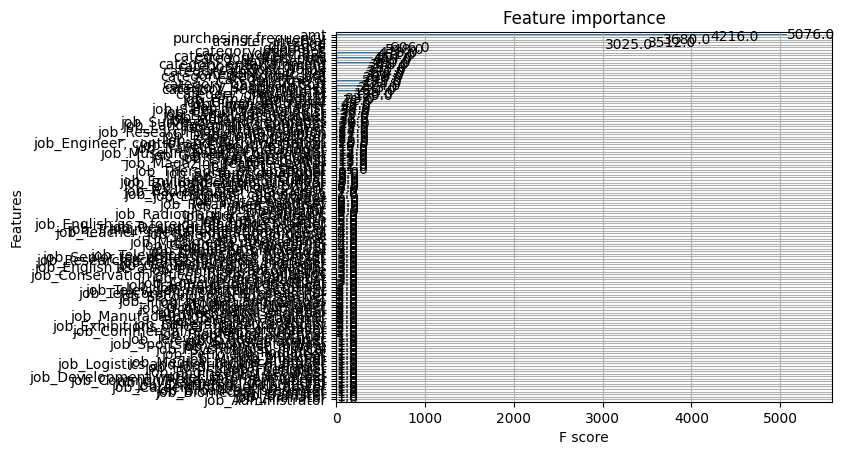

In [ ]:
# Key features


df_pos=df[df['is_fraud']==1].reset_index()
df_pos=df_pos.drop('index',axis=1)
df_neg=df[df['is_fraud']==0]

df_neg= df_neg.sample(frac=1,random_state=30).reset_index()
df_neg=df_neg.drop('index',axis=1)
df_neg=df_neg[0:100000]
df_o=pd.concat([df_neg,df_pos]).reset_index()
df_o=df_o.drop('index',axis=1)







scaler = StandardScaler()


df_o=df_o.drop(['zip','Unnamed: 0.1','cc_num','trans_date_trans_time','Unnamed: 0','merchant','first','last','street','city','state','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)
df_o=df_o.dropna().reset_index()
label=df_o['is_fraud']






df_o=df_o.drop('index',axis=1)
df_o=df_o.drop('is_fraud',axis=1)
df_o=pd.get_dummies(df_o, columns = ['gender','category','daytime','job'])
column_name=df_o.columns.values.tolist()




print(type(df_o))
df_o=scaler.fit_transform(df_o)
df_o = pd.DataFrame(df_o, columns=column_name)
df_o['label']=label


X=df_o.drop(['label'], axis = 1)
y=df_o['label']
smenn = SMOTEENN()
X_resampled, y_resampled = smenn.fit_resample(X, y)
df_o=X_resampled
df_o['label']=y_resampled




print(type(df_o))
x = df_o.drop('label', axis = 1)
y = df_o[['label']]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)
print(y_test)

# Xgboost model

# Set parameters
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 0.1,
    'subsample': 1.0,
    'colsample_bytree': 0.75,
    'min_child_weight': 3,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4
}
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 500



# # Tune parameters
# from sklearn.model_selection import GridSearchCV
# param = {'max_depth': [3, 6, 10],
#          'min_child_weight':[1, 3, 5],
#           'learning_rate': [0.01, 0.1, 0.2],
#           'subsample': [0.5,1.0],
#             'lambda':[0.1, 0.5]
#           }



# xgbc = xgb.XGBClassifier( objective= 'binary:logistic',seed=42)
# clf = GridSearchCV(estimator=xgbc,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf.best_params_)
# Fitting 5 folds for each of 108 candidates, totalling 540 fits
# Best parameters: {'lambda': 0.5, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 1.0}




params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 10,
    'lambda': 0.5,
    'subsample': 1.0,
    'colsample_bytree': 0.75,
    'min_child_weight': 5,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4,
    'learning_rate':0.2
}
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 500



#Train Xgboost model
model = xgb.train(params, dtrain, num_rounds)

plot_importance(model)
plot.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

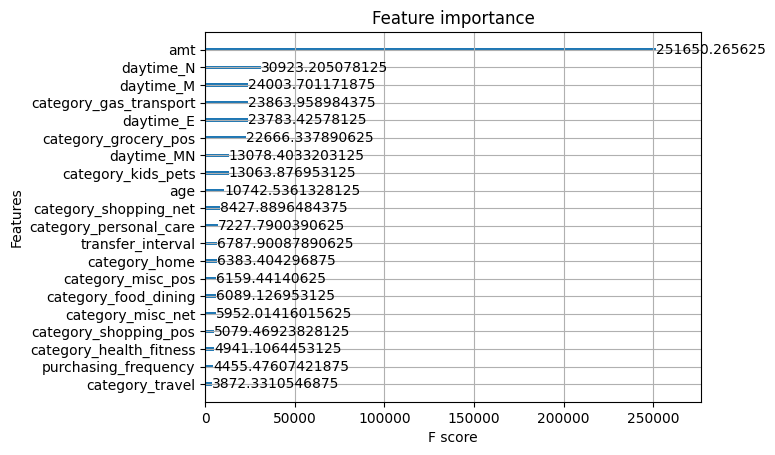

In [ ]:

plot_importance(model,max_num_features=20,importance_type='total_gain')
# model.get_score(importance_type='gain')

In [24]:
# kernelizing-sampling-modeling
# Adjusting sequence

scaler = StandardScaler()
Kpca = KernelPCA(n_components=20, kernel='rbf')



df_kpca=df1.drop('is_fraud',axis=1)
# df_kpca=df_kpca.drop('index',axis=1)
df_kpca=pd.get_dummies(df_kpca, columns = ['gender','category','daytime','job'])
df_kpca['label']=label





print(Counter(df_kpca['label']))
df_kpca=df_kpca.reset_index()
# df_kpca=df_kpca.reset_index()
df_kpca=df_kpca.drop('index',axis=1)
df_kpca=df_kpca.drop('level_0',axis=1)
print(1,df_kpca['label'])




names=[str(x) for x in range(1,21)]

df_pca_1=df_kpca.drop('label',axis=1)
label_1=df_kpca['label']




df_pca_1= Kpca.fit_transform(df_pca_1)
df_kpca=scaler.fit_transform(df_pca_1)
df3 = pd.DataFrame(df_kpca, columns = names)
df3['label']=label_1
print(df3.shape)


x1 = df3.drop(['label'], axis = 1)
y1 = df3[['label']]







smenn = SMOTEENN()
X_resampled, y_resampled = smenn.fit_resample(x1, y1)
print(Counter(y_resampled))

x_train_k1,x_test_k1,y_train_k1,y_test_k1=train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=200)
print(y_test_k1)


Counter({0: 20000, 1: 7382})
1 0        0
1        0
2        0
3        0
4        0
        ..
27377    1
27378    1
27379    1
27380    1
27381    1
Name: label, Length: 27382, dtype: int64
(27382, 21)
Counter({'label': 1})
       label
7878       0
13235      1
7583       0
13730      1
3653       0
...      ...
3408       0
122        0
13340      1
15274      1
7217       0

[4795 rows x 1 columns]


In [ ]:
# Xgboost model

# Set parameters
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 0.1,
    'subsample': 1.0,
    'colsample_bytree': 0.75,
    'min_child_weight': 3,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4
}
dtrain = xgb.DMatrix(x_train_k, y_train_k)
num_rounds = 500



# # Tune parameters
# from sklearn.model_selection import GridSearchCV
# param = {'max_depth': [3, 6, 10],
#          'min_child_weight':[1, 3, 5],
#           'learning_rate': [0.01, 0.1, 0.2],
#           'subsample': [0.5,1.0],
#             'lambda':[0.1, 0.5]
#           }



# xgbc = xgb.XGBClassifier( objective= 'binary:logistic',seed=42)
# clf = GridSearchCV(estimator=xgbc,
#                    param_grid=param,
#                    scoring='f1',
#                    verbose=1)
# clf.fit(x_train,  y_train.values.ravel())
# print("Best parameters:", clf.best_params_)
# Fitting 5 folds for each of 108 candidates, totalling 540 fits
# Best parameters: {'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 1.0}




params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 0.1,
    'subsample': 1.0,
    'colsample_bytree': 0.75,
    'min_child_weight': 5,
    'silent': 0,
    'eta': 0.01,
    'seed': 1,
    'nthread': 4,
    'learning_rate':0.2
}
dtrain = xgb.DMatrix(x_train_k1, y_train_k1)
num_rounds = 500



#Train Xgboost model
model = xgb.train(params, dtrain, num_rounds)

# Test the model
dtest = xgb.DMatrix(x_test_k1)
y_pred_k1 = model.predict(dtest)

dtrain_x = xgb.DMatrix(x_train_k1)
dtrain_y = xgb.DMatrix(y_train_k1)
y_pred_train1=model.predict(dtrain_x )

# f1 score
print('Train f1 score is',f1_score(y_train_k1,y_pred_train1))
print('Test f1 score is',f1_score(y_test_k1,y_pred_k1))

# Confusion matrix
from sklearn.metrics import confusion_matrix
C_mat=pd.DataFrame(confusion_matrix(y_test_k1,y_pred_k1,labels=[0,1]),index=["Actual:0","Actual:1"],
                   columns=["Pred:0","Pred:1"])
print (C_mat)


[03:19:15] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Train f1 score is 0.9636741561912303
Test f1 score is 0.8963165075034105
          Pred:0  Pred:1
Actual:0    2316     273
Actual:1     183    1971
